In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings

<h3>Generally we first look at what features are important(corr) then work on missing data then remove outliers and lastly we do normalization, Homoscedasticity , linear realation, absense of correlated error. But here we will directly jump to missing datas since we have done the other things in the previous notebook</h3>

In [2]:
warnings.filterwarnings('ignore')

In [12]:
plt.style.use('seaborn')

In [3]:
df_train = pd.read_csv('./files/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.corr().shape

(38, 38)

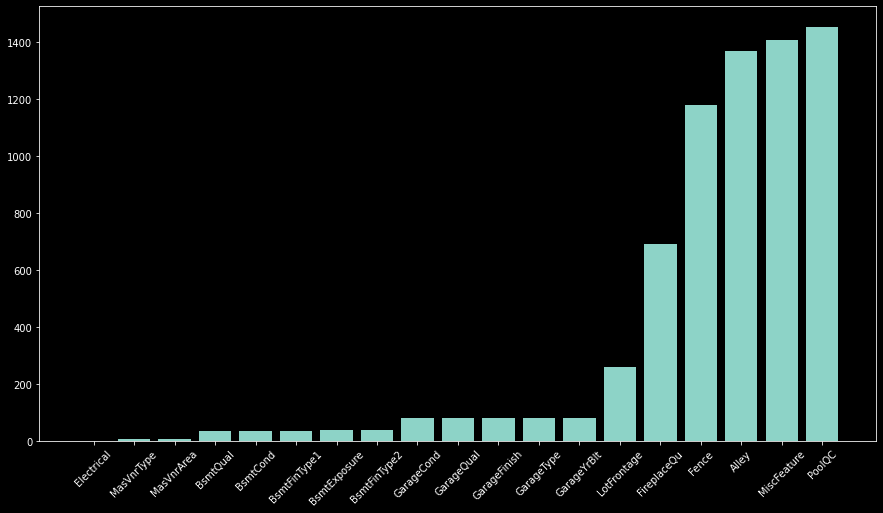

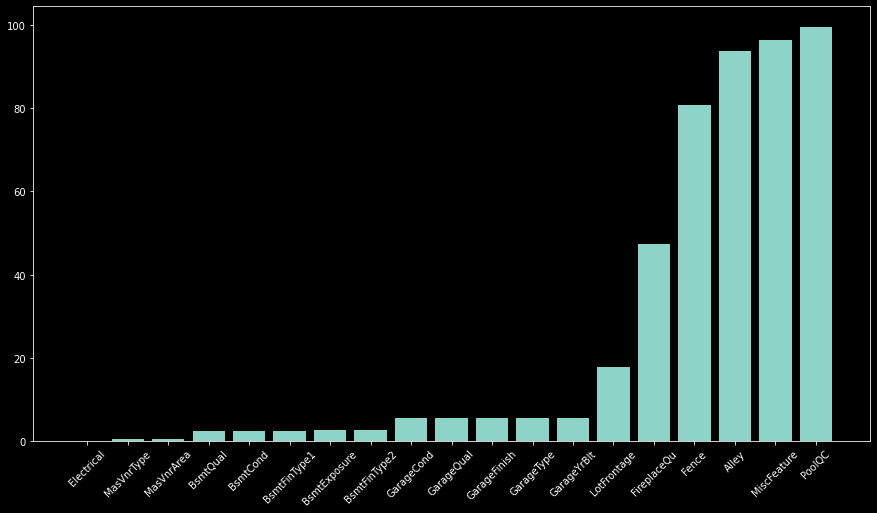

In [25]:
missing = df_train.isnull().sum()
missing = missing[missing > 0].sort_values()

percent = (missing/df_train.shape[0])* 100

cols = missing.index

plt.figure(figsize=(15, 8))
plt.bar(cols, missing.values)
plt.xticks(rotation=45)

plt.figure(figsize=(15, 8))
plt.bar(cols, percent)

plt.xticks(rotation=45)

plt.show()

<p>We generally remove a column if 15 percent of the data is missing. But here all of the missing data is not important</p>

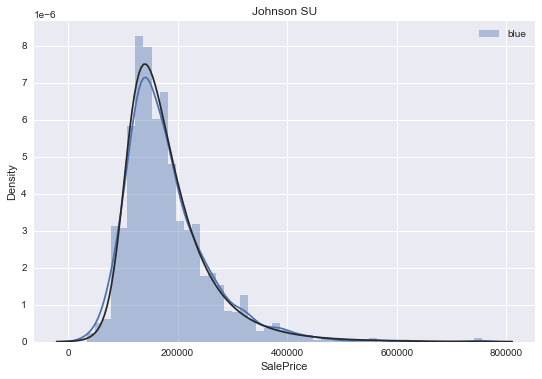

In [21]:
y = df_train['SalePrice']

plt.figure(); plt.title('Johnson SU')
sns.distplot(y, kde=True, fit=st.johnsonsu, label='blue')

plt.legend()

plt.show()

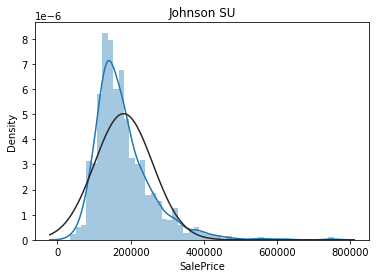

In [6]:
y = df_train['SalePrice']

plt.figure(); plt.title('Johnson SU')
sns.distplot(y, kde=True, fit=st.norm)
plt.show()

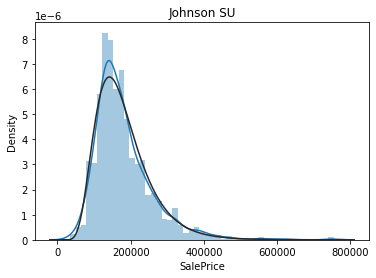

In [7]:
y = df_train['SalePrice']

plt.figure(); plt.title('Johnson SU')
sns.distplot(y, kde=True, fit=st.lognorm)
plt.show()